## EDA LOAN PREDICTION ANALYSIS:

### <font color = blue>Filtering out the warnings</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

### <font color = blue> Imoporting the Required Libraries </font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### We have the data of large number of bank loan customers along with various pieces of information about the customers. In these EDA CASE STUDY we will find intresting insights from data and predecting the credit availability of customers.

### <font color=blue> Reading Data </font> 

In [3]:
## Importing loan application data

application_df = pd.read_csv('application_data.csv')
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
## Importing previous loan application data

previous_df = pd.read_csv('previous_application.csv')
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### <font color = blue> 1.Inspecting Dataframe </font>

#### Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
## checking the number of rows and columns in dataframe.

application_df.shape

(307511, 122)

In [6]:
## checking column wise info of dataframe and their data types.

application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
## checking the summary for numeric columns.

application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### <font color=blue> 2.Data Checking and Missing Values

In [8]:
### Checking null values in application_df dataframe

application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
### AS NULL VALUES ARE HIGHER IN SOME COLUMNS WE WILL CONVERT INTO PERCENTAGE FORMAT FOR EASIER OPERATION.

In [10]:
null_values = round((application_df.isnull().sum()/len(application_df) * 100),2)
null_values

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [11]:
### showing the colomns list those are having null values.

NULL_VALUES_1 = null_values[null_values>0]
NULL_VALUES_1

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64

In [12]:
len(NULL_VALUES_1)

64

In [13]:
### As a coloumns having null values are 64 and it is impossible to showcase all column at once. So we are going to visualise all columns having null values for good understanding.

#### Graphical Representation of Null value columns.

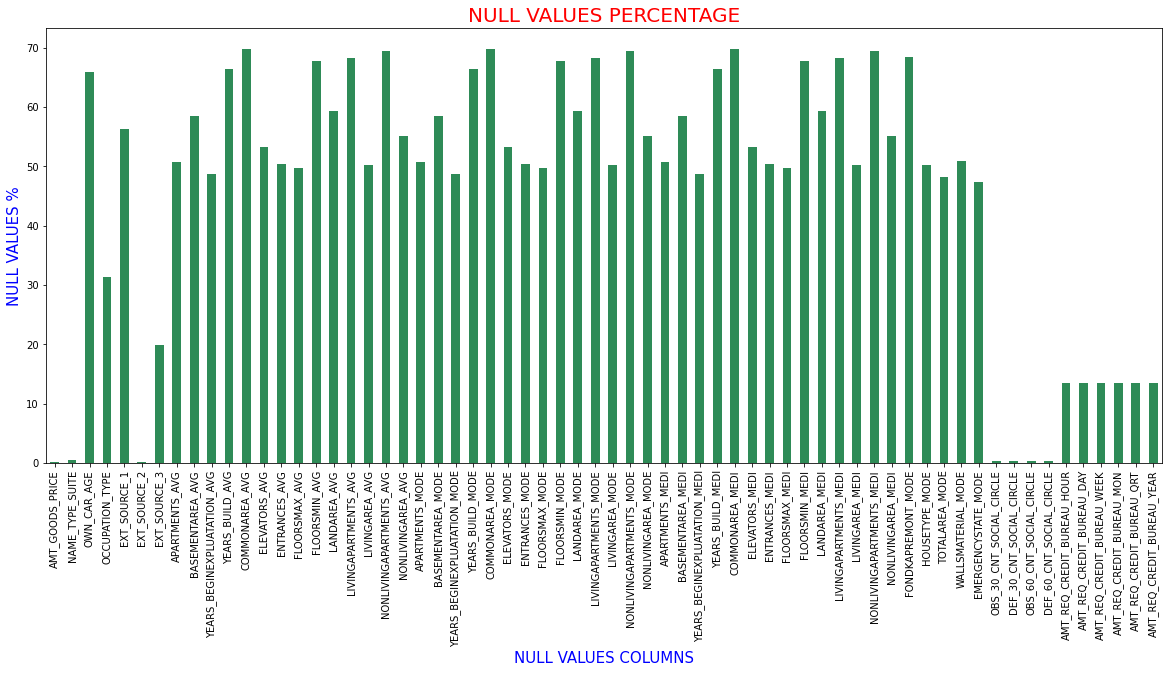

In [14]:
plt.figure(figsize=(20,8))
plt.title('NULL VALUES PERCENTAGE', fontsize=20, fontweight=5, color='red')
NULL_VALUES_1.plot(kind='bar', color='seagreen')
plt.ylabel('NULL VALUES %', fontsize=15, color='blue')
plt.xlabel('NULL VALUES COLUMNS', fontsize=15, color='blue')
plt.xticks(rotation=90)
plt.show()

#### After visualising the null values coloumn we get clear picture of missing values percentage which is more than 50% in many columns which will hamper our analysis and mislead in getting insights.
#### Therefore, we are dropping missing value columns which are more then 50% to avoid hampering in our data analysis.

In [15]:
NULL_VALUES_50 = NULL_VALUES_1[NULL_VALUES_1>50.00]
NULL_VALUES_50

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [16]:
## Total number of columns having more than 50% null values

len(NULL_VALUES_50)

41

In [17]:
## Dropping 41 columns having null percentage more than 50%

application_df = application_df.drop(NULL_VALUES_50.index, axis=1)
application_df.shape

(307511, 81)

In [18]:
## checking the columns having less null percentage (<10%)

NULL_VALUES_10 = NULL_VALUES_1[NULL_VALUES_1<10]
NULL_VALUES_10

AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

In [19]:
### These columns have a null values less than 10% which should be imputed with appropriate value in further analysis.

NULL_VALUES_10.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [20]:
## understand the insight of missing columns having <10% null values

application_df[NULL_VALUES_10.index].describe()

,AMT_GOODS_PRICE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,3.072330e+05,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000
mean,5.383962e+05,5.143927e-01,1.422245,0.143421,1.405292,0.100049
std,3.694465e+05,1.910602e-01,2.400989,0.446698,2.379803,0.362291
min,4.050000e+04,8.173617e-08,0.000000,0.000000,0.000000,0.000000
25%,2.385000e+05,3.924574e-01,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,5.659614e-01,0.000000,0.000000,0.000000,0.000000
75%,6.795000e+05,6.636171e-01,2.000000,0.000000,2.000000,0.000000
max,4.050000e+06,8.549997e-01,348.000000,34.000000,344.000000,24.000000


#### for imputation analysis we have selected 7 variables:
    1. continious variables:
        'EXT_SOURCE_2', 'AMT_GOODS_PRICE'
        
    2. categorical variables:
        'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE'

#### Continious variables:

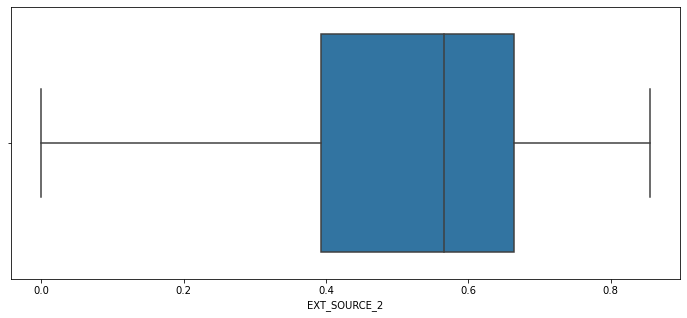

In [21]:
## box plot for continious variables

plt.figure(figsize=(12,5))
sns.boxplot(application_df['EXT_SOURCE_2'])
plt.show()

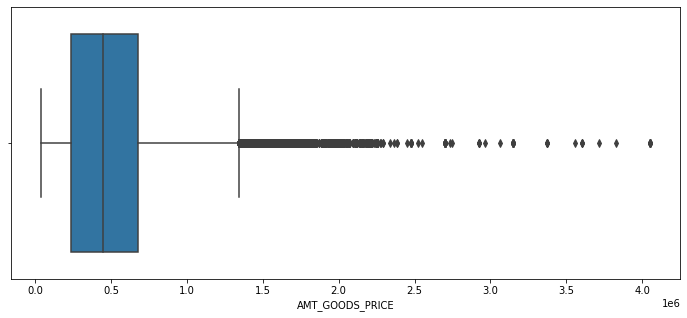

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(application_df['AMT_GOODS_PRICE'])
plt.show()

    Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing values with median value

#### INFERENCE FROM BOXPLOT FOR CONTINIOUS VARIABLES:
1. for 'EXT_SOURCE_2' there is no outliers present. And there is no significant diffence observed between mean and median. However data look to be right skewed. So missing values can be imputed with median value: 0.565

2. for 'AMT_GOODS_PRICE' there is significant number of outlier present in the data. SO data should be imputed with median value: 450000

#### Categorical Variables:

In [23]:
### Identifying maximum occurence values in categorical values

print('Maximum Frequncy categorical values are,')
print('NAME_TYPE_SUITE: ',application_df['NAME_TYPE_SUITE'].mode()[0])
print('OBS_30_CNT_SOCIAL_CIRCLE:', application_df['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_30_CNT_SOCIAL_CIRCLE:', application_df['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE:', application_df['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE:', application_df['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

Maximum Frequncy categorical values are,
NAME_TYPE_SUITE:  Unaccompanied
OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0


In [24]:
### Removing unnecessary columns from dataset for better analysis.

unnecessary_data = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

application_df.drop(labels=unnecessary_data, axis=1, inplace=True)

In [25]:
application_df.shape

(307511, 36)

In [26]:
### Revewing Dataset

application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0


    There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [27]:
### Let's find these categorical columns having "XNA" values

## for gender columns

application_df[application_df['CODE_GENDER']=='XNA'].shape

(4, 36)

In [28]:
## for organistaion column

application_df[application_df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 36)

   So, there are 4 rows from Gender column and 55374 rows from Organization type column

In [29]:
## Describing gender columns to check number of males and females

application_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

    Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender'F'as there will be no impact on the dataset.

In [30]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

application_df.loc[application_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [31]:
### Describing organisation type columns

application_df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

#### <font color =red> COMMENT : </font>
    So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA'values Which means ~18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [32]:
### Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

application_df=application_df.drop(application_df.loc[application_df['ORGANIZATION_TYPE']=='XNA'].index)
application_df[application_df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 36)

#### Therefore we handled all NA Values and imputed all required values for further analysis

 Following age and days are having -ve values, which needs to converted to +ve value.

    'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'

In [33]:
# Converting '-ve' values into '+ve' Values
application_df['DAYS_BIRTH'] = application_df['DAYS_BIRTH'].abs()
application_df['DAYS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].abs()
application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].abs()
application_df['DAYS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].abs()
application_df['DAYS_LAST_PHONE_CHANGE'] = application_df['DAYS_LAST_PHONE_CHANGE'].abs()

### <font color=blue> Data Imbalance Ratio </font>

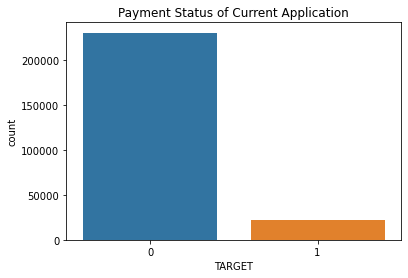

In [34]:
plt.title('Payment Status of Current Application')
sns.countplot(application_df['TARGET'])
plt.show()

#### Checking Data Imbalance Ratio

In [35]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

non_default = application_df[application_df['TARGET'] == 0]
default = application_df[application_df['TARGET'] == 1]

print('No. of defaulters:', default.shape[0])
print('No. of non_defaulters:', non_default.shape[0])

No. of defaulters: 21835
No. of non_defaulters: 230302


In [36]:
print('Percenatge of Defaulters:', round((21835/(21835+230302)*100),2))

Percenatge of Defaulters: 8.66


In [37]:
### calculating the imbalance ratio:

print('Imbalance ratio:', round((230302/21835),2))

Imbalance ratio: 10.55


#### The Imbalance Ratio is 10.55

   #### COMMENT: This data is highly imbalanced as number of defaulters is very less in total population

### <font color=blue> 3.Univariate Analysis </font>

#### BINS CREATION FOR "AMT_CREDIT" and 'AMT_INCOME TOTAL'

In [38]:
### for AMT_INCOME_RANG

bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']
application_df['AMT_INCOME_RANGE']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [39]:
### for AMT_CREDIT

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000','600000-700000','700000-800000','850000-900000','900000 and above']

application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'],bins,labels=slot)

#### Univariate analysis for categories

#### Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)

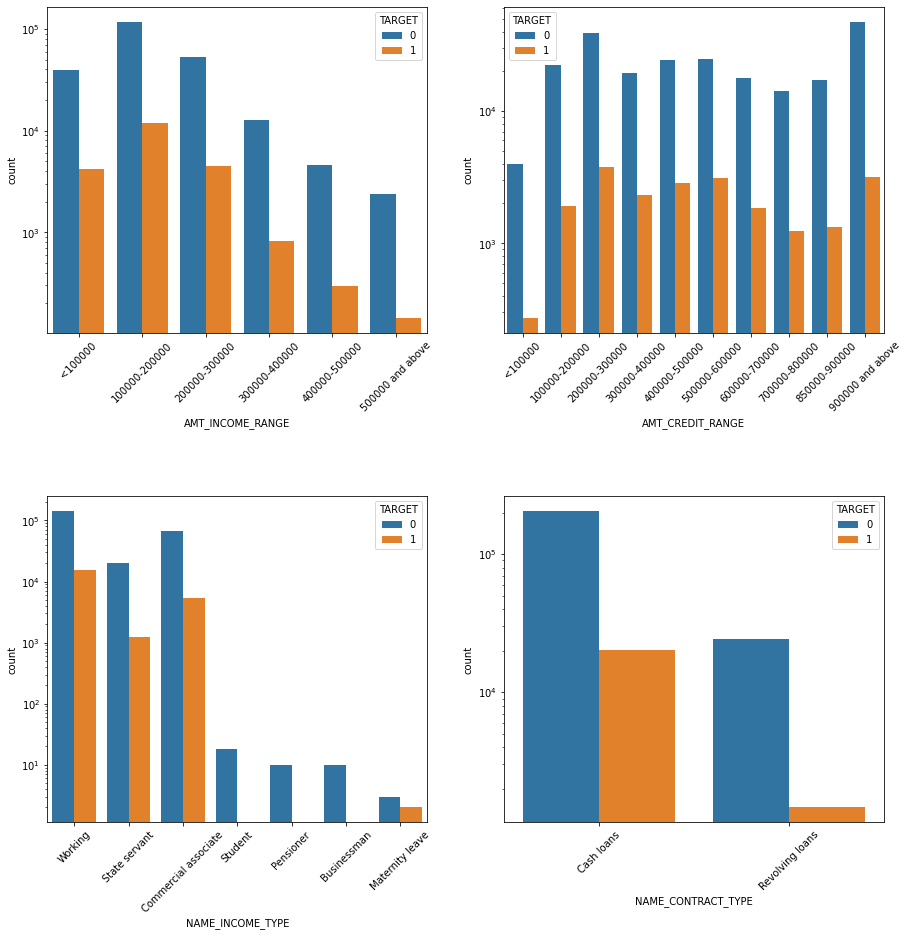

In [40]:
features = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (15, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = application_df)
    plt.xticks(rotation = 45)
    plt.yscale('log')
plt.show()

#### INSIGHTS:

1. AMT_INCOME_RANGE :

    * The people having 100000-200000 are having higher number of loan and also having higher in defaulter
    * The income segment having >500000 are having less defaulter.

2. AMT_CREDIT_RANGE:

    * The people having <100000 loan are less defaulter.
    * income having more than >100000 are almost equal % of loan defaulter

3. NAME_INCOME_TYPE:

    * Student pensioner and business have higher percentage of loan repayment.
    * Working, State servent and Commercial associates have higher default percentage.
    * Maternity category is significantly higher problem in replayement.

4. NAME_CONTRACT_TYPE:

    * For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type
    * From the above graphs we can see that the Revolving loans are small amount compared to Cash loans but the % of non payment for the revolving loans are comapritvely high.

In [41]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,200000-300000,400000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,1.0,0.0,1.0,0.0,828.0,200000-300000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,0.0,0.0,0.0,0.0,815.0,<100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,100000-200000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,100000-200000,500000-600000


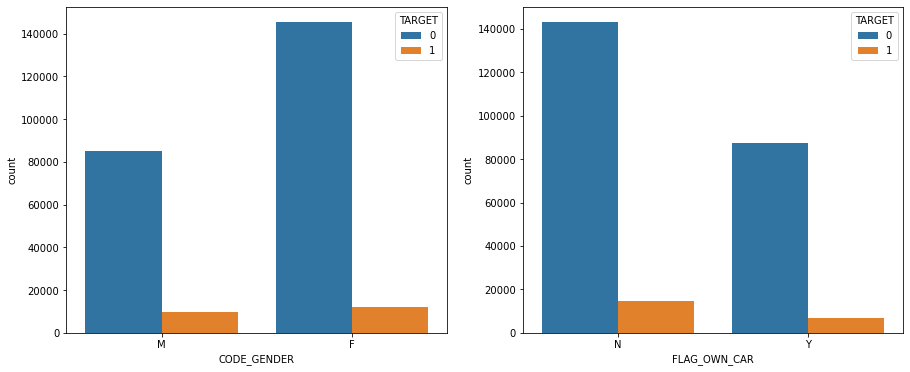

In [42]:
features = ['CODE_GENDER','FLAG_OWN_CAR']
plt.figure(figsize = (15, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = application_df)
plt.show()

INSIGHTS:

1. CODE_GENDER:

    * The % of defaulters are more in Male than Female


2. FLAG_OWN_CAR:

    * The person  owning car is having slighter higher percentage of defaulter.

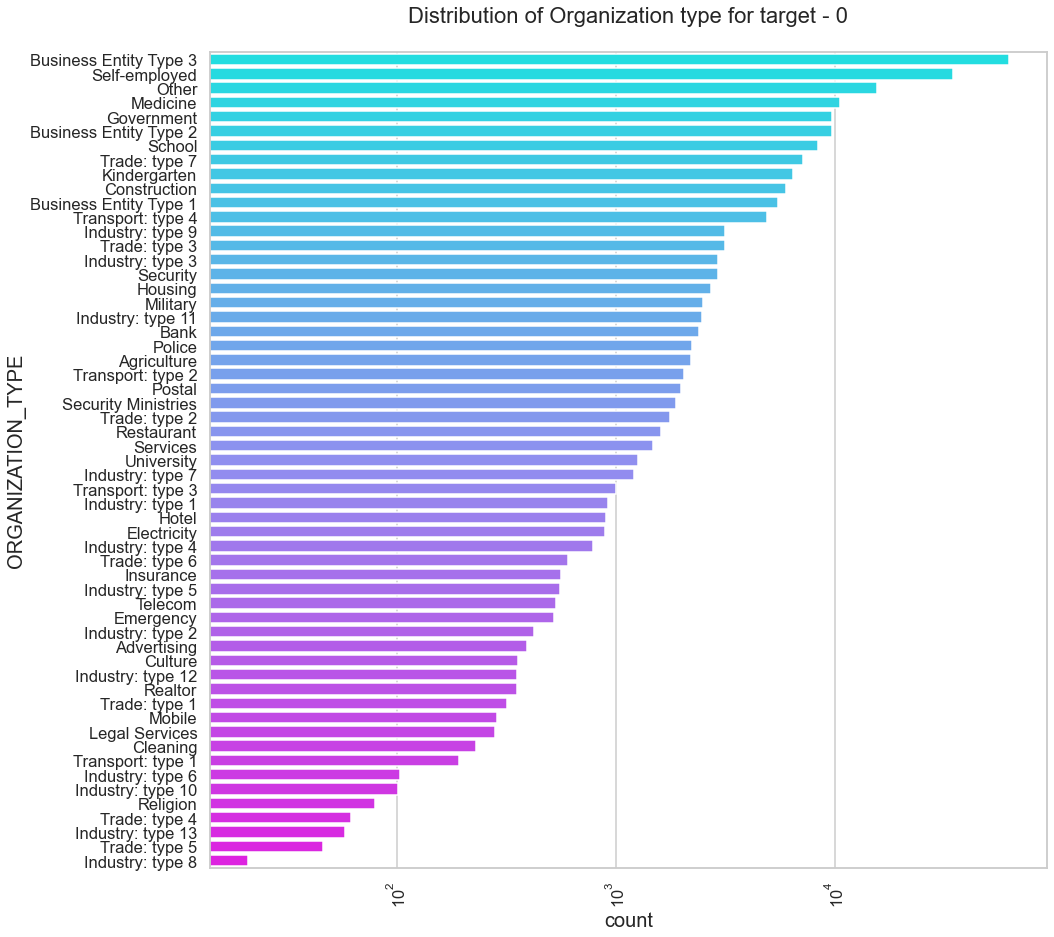

In [51]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=non_default,y='ORGANIZATION_TYPE',order=non_default['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

####  INSIGHTS

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


  #### Univariate analysis for continious variables

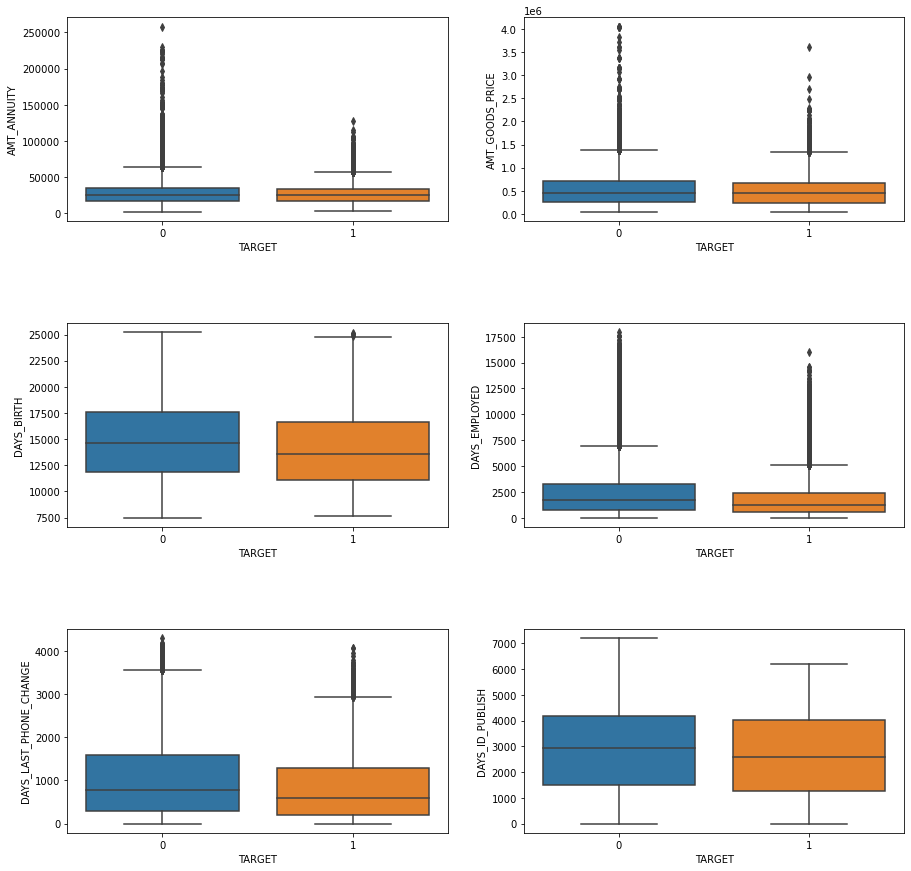

In [44]:
data = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']
plt.figure(figsize = (15,15))

for i in enumerate(data):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data = application_df)
plt.show()

#### INSIGHTS:

   * Days_Birth: The people having higher age are having higher probability of repayment.
   
   * Some outliers are observed in In 'AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', DAYS_LAST_PHONE_CHANGE in the   dataset.
   
   * Less outlier observed in Days_Birth and DAYS_ID_PUBLISH
   
   * 1st quartile is smaller than third quartile in In 'AMT_ANNUITY','AMT_GOODS_PRICE', DAYS_LAST_PHONE_CHANGE.
   
   * In DAYS_ID_PUBLISH: people changing ID in recent days are relativelty prone to be default.
   
   * There is single high value data point as outlier present in DAYS_EMPLOYED. Removal this point will drastically impact the box plot for further analysis.

**Bivariate analysis for numerical variables**

**For Target 0**

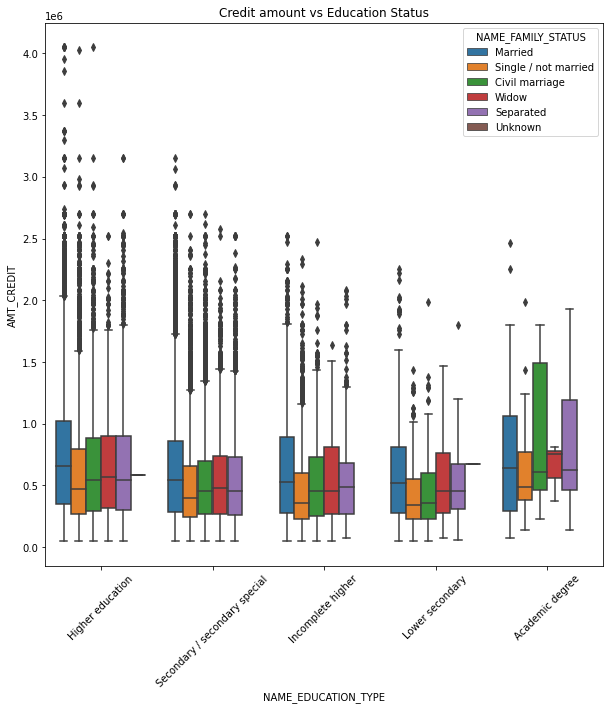

In [45]:
## Box plot for credit amount

plt.figure(figsize=(10,10))
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

#### INSIGHTS:

    * From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.


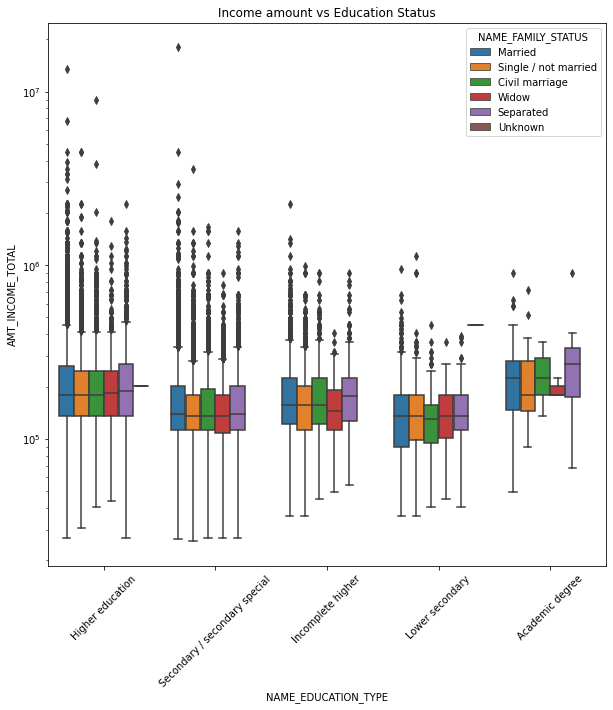

In [46]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### INSIGHTS:
   * From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

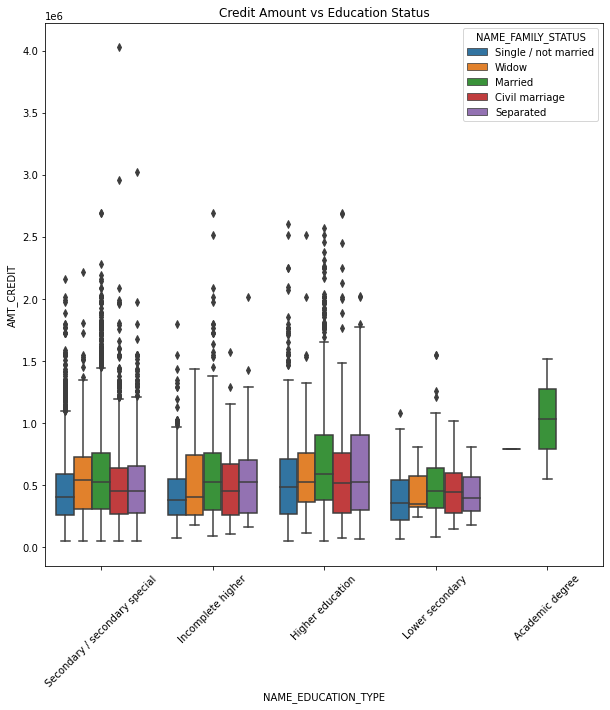

In [47]:
# Box plotting for credit amount

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### INSIGHTS:
   * Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
   * Most of the outliers are from Education type 'Higher education' and 'Secondary'.
   * Civil marriage for Academic degree is having most of the credits in the third quartile.

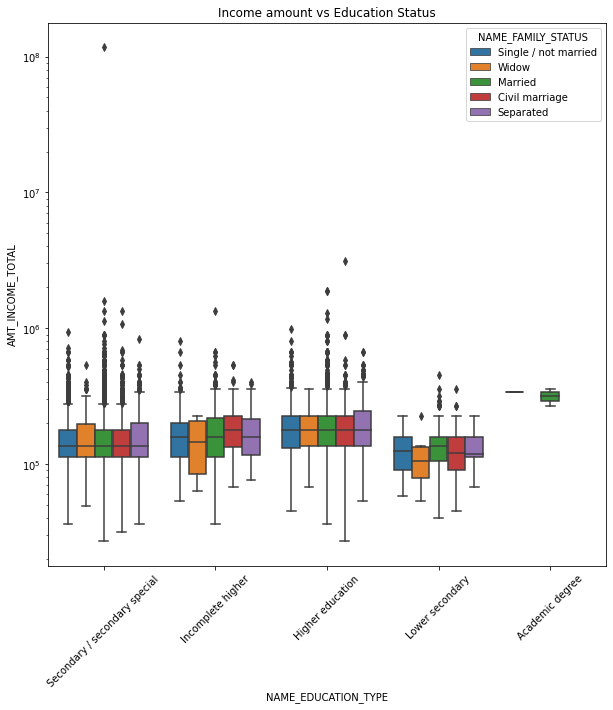

In [48]:
# Box plotting for Income amount

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### INSIGHTS:
   * There is also have some similarity with Target0,
   * Education type 'Higher education' the income amount is mostly equal with family status.
   * Less outlier are having for Academic degree but there income amount is little higher that Higher education.
   * Lower secondary are have less income amount than others.

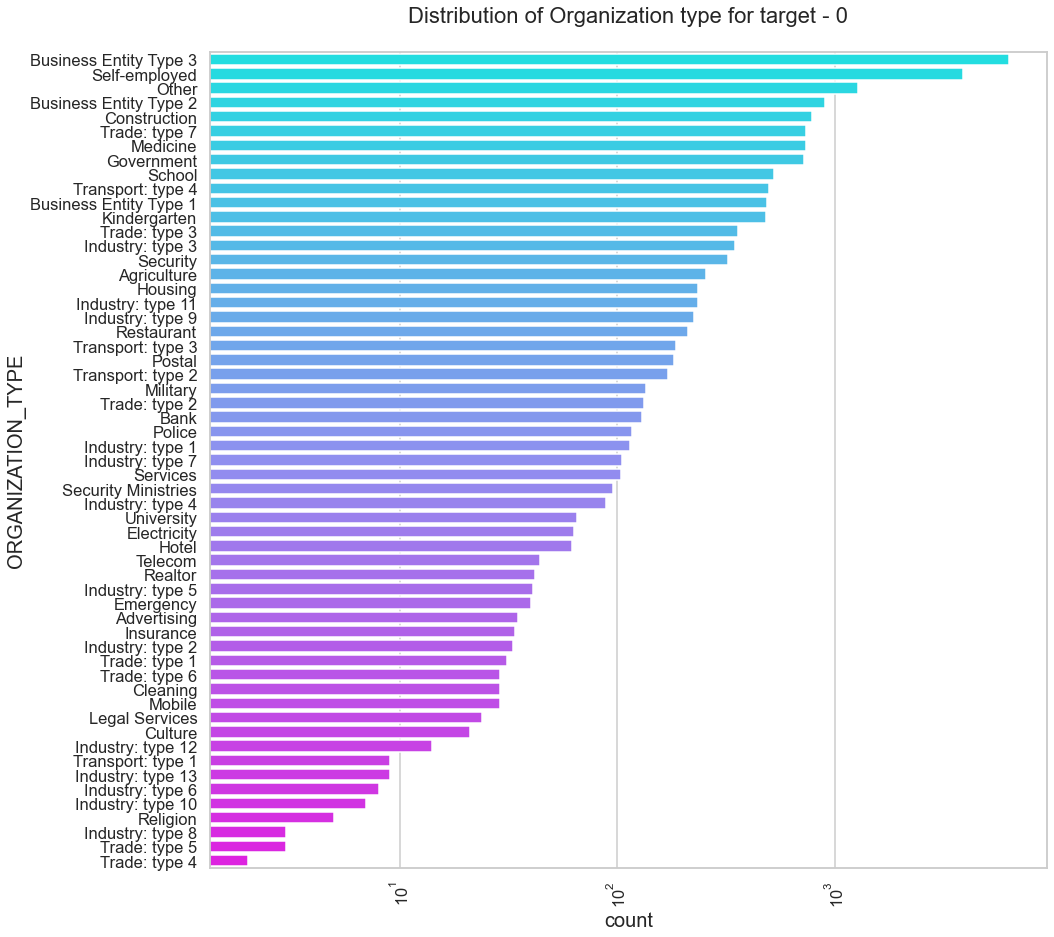

In [52]:
### Plot for distribution of organization type target=1

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=default,y='ORGANIZATION_TYPE',order=default['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()


INSIGHTS:

   * Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ ,‘Selemployed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
   * Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
   * Same as type 0 in distribution of organization type.

### <font color=blue> 4.Correlation </font>

 #### Getting top 10 correlation between variables for defaulters

In [ ]:
# Top 10 correlated variables: target 1 dataaframe

defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

In [ ]:
## Listing the correlation in pair sorted in descending order.

corr_list.sort_values(ascending=False).drop_duplicates().head(11)

#### TOP 10 CORRELATION FOR DEFAULTERS
    1. (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)       
    2. (AMT_CREDIT, AMT_GOODS_PRICE)                
    3. (DEF_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE)      
    4. (REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION)    
    5. (LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY)         
    6. (AMT_GOODS_PRICE, AMT_ANNUITY)                    
    7. (AMT_ANNUITY, AMT_CREDIT)                     
    8. (REG_REGION_NOT_WORK_REGION, REG_REGION_NOT_LIVE_REGION)     
    9. (REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY)         
    10. (DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)   

 #### Getting top 10 correlation between variables for  non-defaulters

In [ ]:
non_defaulter_corr = non_default.corr()
round(non_defaulter_corr, 2)

non_corr_list = non_defaulter_corr.unstack()

In [ ]:
# Listing the correlation in pair sorted in descending order

non_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

#### TOP 10 CORRELATION FOR NON-DEFAULTERS
    1. (OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE)      
    2. (AMT_GOODS_PRICE, AMT_CREDIT)                     
    3. (DEF_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE)       
    4. (REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION)    
    5. (LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY)         
    6. (AMT_GOODS_PRICE, AMT_ANNUITY)                    
    7. (AMT_CREDIT, AMT_ANNUITY)                    
    8. (REG_REGION_NOT_WORK_REGION,  REG_REGION_NOT_LIVE_REGION)     
    9. (REG_CITY_NOT_WORK_CITY, REG_CITY_NOT_LIVE_CITY)        
    10. (AMT_ANNUITY, AMT_INCOME_TOTAL)               

###  <font color=blue> 5. Reading Previous Application Data </font>

In [ ]:
#Reading Previous application

previous_df.head(5)

In [ ]:
previous_df.shape

In [ ]:
# Cleaning the missing data

# listing the null values columns having more than 50%

Null_col = previous_df.isnull().sum()
Null_col = Null_col[Null_col.values>(0.5*len(Null_col))]
len(Null_col)

In [ ]:
# Removing those 15 columns

Null_col = list(Null_col[Null_col.values>0.5].index)
previous_df.drop(labels=Null_col,axis=1,inplace=True)

previous_df.shape

In [ ]:
# Removing the column values of 'XNA' and 'XAP'

previous_df=previous_df.drop(previous_df[previous_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_df=previous_df.drop(previous_df[previous_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_df=previous_df.drop(previous_df[previous_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

previous_df.shape

In [ ]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=application_df,right=previous_df,how='inner',on='SK_ID_CURR',suffixes='_x')

In [ ]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV', 'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [ ]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**Performing univariate analysis**

In [ ]:
## plot for Distribution of contract status with purposes

plt.figure(figsize=(15,15))
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.xscale('log')

plt.show()

INSIGHTS:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

In [ ]:
# Distribution of contract status

plt.figure(figsize=(15,15))
sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE',order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')
plt.title('Distribution of purposes with target ')
plt.xticks(rotation=90)
plt.xscale('log')
plt.show()


INSIHTS:
   1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
   2. There are few places where loan payment is significant higher than facing difficulties.
   3. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
   4. Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

**Performing bivariate analysis**

In [ ]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

INSIGHTS:
   1. For Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
   2. bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment
   3. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

## <font color=red> CONCLUSION : </font>

**1. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.**

**2.  Bank should keep continue to caution while giving loan for the repair purpose.**

**3. Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.**

**4. Applicant on maternity leave and unemployed has highest percentage of defaulters.**

**5. Bank should focus less on income type 'working' as they have most number of unsuccessful payments**

**6. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.**